This is a classified data set from a company. They've hidden the feature column names but have given you the data and the target classes. 

We'll use KNN to create a model that directly predicts a class for a new data point based off of the features.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read anonomized data with gibberish column names into dataframe
df = pd.read_csv(r"https://raw.githubusercontent.com/koen-d-r/udemy_knn_and_elbow_method/master/Classified%20Data",index_col=0)

In [3]:
# check data
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
# check data
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [5]:
# import standard scaler for standardizing the data
from sklearn.preprocessing import StandardScaler

In [6]:
# create StandardScaler instance
scaling = StandardScaler()

In [7]:
# fit to all columns except 'TARGET CLASS'
scaling.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [8]:
# transform data into standardized data
scaled_feats = scaling.transform(df.drop('TARGET CLASS', axis=1))

In [9]:
# check results
scaled_feats

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [10]:
# put in newly created dataframe
df_feat = pd.DataFrame(scaled_feats, columns=df.columns[:-1])

In [11]:
# get all but last column names
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [12]:
# import KNN classifier
from sklearn.neighbors import KNeighborsClassifier

# create KNN instance
knn = KNeighborsClassifier(n_neighbors = 1)

In [13]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [14]:
# create train and test sets with train_test_split
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
# fit and predict with n_neighbors = 1 
knn.fit(X_train, y_train)
knn1_pred = knn.predict(X_test)

In [16]:
# import classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
error_rate = []

# create for loop with range from 1 to 50 and predict for all numbers in range the error rate. Append results in 
# list error_rate

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

In [18]:
# check results of error_rate
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05,
 0.04,
 0.043333333333333335,
 0.043333333333333335,
 0.043333333333333335,
 0.043333333333333335,
 0.05333333333333334,
 0.05,
 0.06,
 0.056666666666666664,
 0.05333333333333334]

Text(0, 0.5, 'Error Rate')

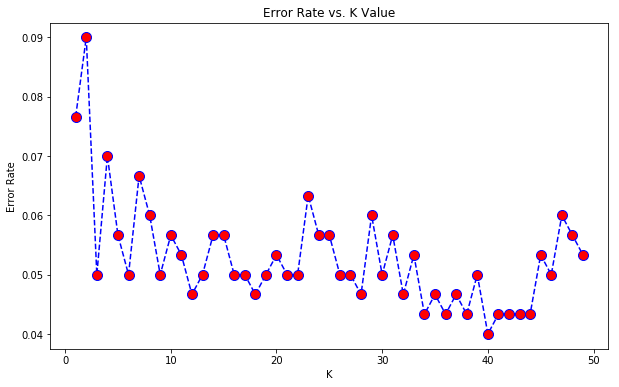

In [19]:
# plot data
plt.figure(figsize = (10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [20]:
# let's find out if n_neighbors = 40 gives better predictions!
knn = KNeighborsClassifier(n_neighbors = 40)
knn.fit(X_train, y_train)
knn40_pred = knn.predict(X_test)

In [23]:
print('WITH N_NEIGHBORS = 1')
print(classification_report(y_test, knn1_pred))
print(confusion_matrix(y_test, knn1_pred))
print('\n')

print('WITH N_NEIGHBORS = 40')
print(classification_report(y_test, knn40_pred))
print(confusion_matrix(y_test, knn40_pred))
print('\n')



WITH N_NEIGHBORS = 1
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

[[151   8]
 [ 15 126]]


WITH N_NEIGHBORS = 40
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       159
           1       0.96      0.95      0.96       141

   micro avg       0.96      0.96      0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

[[154   5]
 [  7 134]]




In [ ]:
# By increasing our n_neighbors parameter in the KNeighborsClassifier to 40, we improved precision, recall and 
# f1 score!